<a href="https://colab.research.google.com/github/shubhamkumar906/Machine-Learning/blob/master/ML_Project_Bank_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title : 
 **Marketing Campaign for Banking Products**

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.
Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?
Objective:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.


Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your
findings.

    ● Number of unique in each column?
    
    ● Number of people with zero mortgage?

    ● Number of people with zero credit card spending per month?

    ● Value counts of all categorical columns.
      
    ● Univariate and Bivariate analysis
    
4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model


**Steps 1:**
Importing the datasets and libraries, check datatype, statistical summary, shape, null
values etc

Importing the libraries

In [247]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Importing the datasets 

In [248]:
#importing csv data and view data
dataset=pd.read_csv("Bank_Personal_Loan_Modelling.csv")


In [249]:
#To display the top 5 rows
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [250]:
#To display the bottom 5 rows
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Checking datatype

In [251]:
# Checking datatypes of each column
dataset.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [252]:
# To display the datatype of each coulmn and also display the non-null rows for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Statistical Summary

In [253]:
# To describe the summary stats which include count, mean, std deviation, min value, max value
# We see -3 value in experience, need to inspect these values.
# Income values are skewed.
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [254]:
# To display the no of rows and columns in the dataset
dataset.shape

(5000, 14)

Checking null values for each column

In [255]:
# To display how many null values are present in each column
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Step 2:**
Check if you need to clean the data for any of the variables

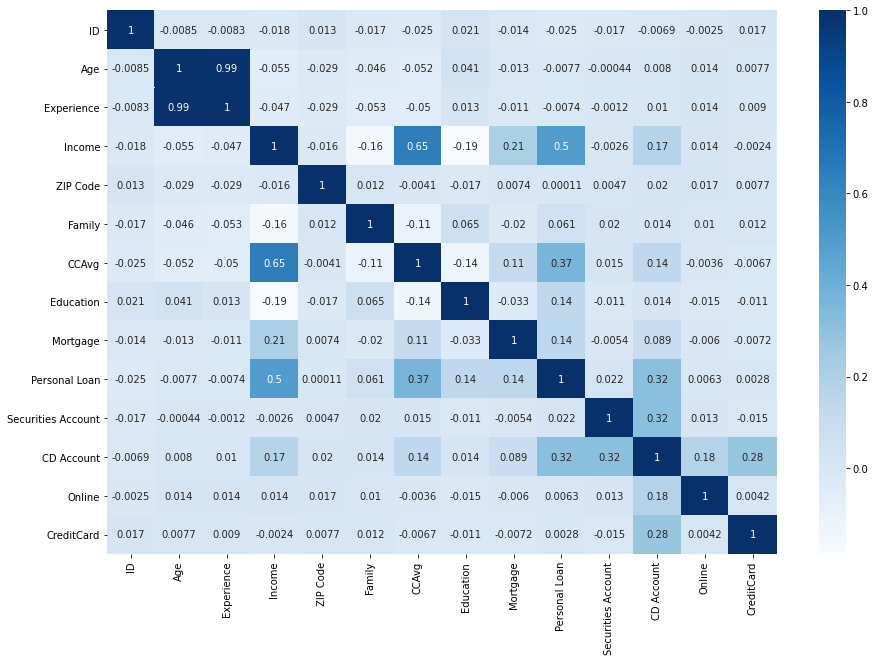

In [256]:
# Income, CCAvg and CD Account have the highest correaltion with Personal Loan with 0.5,0.37,0.32 respectively
# ZIP Code, Experience, CreditCard and Online have the least correlation with Personal Loan with 0.00011,0.0074,00.28,0.0063 respectively.
bank_corr=dataset.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="Blues",annot=True)

Checking correlation between Age and Experience since they seems similar

In [257]:
# Age and Experience seems to be highly correlated 
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [258]:
#52 records have Experience less than zero, this is an error.
dataset[dataset['Experience']<0].shape

(52, 14)

In [259]:
# Removing the Experience column to avoid multi-collinearity with Age (since Experience column also contains negative values)
dataset = dataset.drop(['Experience'],axis=1)
dataset.head(5)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


Removing of irrelevant columns from the dataset

In [260]:
# Dropping irrelevant columns like ID and ZIP Code(which have no revelance in predicting the output variable but acts as a noise to the signal )
dataset = dataset.drop(['ID','ZIP Code'], axis = 1) 
dataset.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**Step 3:**
 EDA (Exploratory Data Analysis) -
 Study the data distribution in each attribute and target variable,    share your findings.

● Number of unique in each column?

● Number of people with zero mortgage?

● Number of people with zero credit card spending per month?

● Value counts of all categorical columns.

Number of unique in each column

In [261]:
# number of unique values in each column
dataset.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Number of people with zero mortgage

In [262]:
## Checking number of people with 0 mortgage
## There are 3462 people with 0 mortgage
(dataset.Mortgage == 0).sum()

3462

Number of people with zero credit card spending 

In [263]:
# checking number of people with 0 credit card spending
# There are 106 people with 0 credit card spending per month
(dataset.CCAvg == 0).sum()

106

Value counts of all categorical columns.

In [264]:
# Value count for Family column
# There are 1472 people with a family size of 1, 1296 with a family size of 2, 1222 people with a family size of 4 and 1010 people with a family size of 3 respectively.
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [265]:
# Value count for Education column
# There are 2096 people with Education level of 1(Undergrad), 1501 people with Education level of 3(Advance/Professional), 1403 people with a Education level of 2(Graduate).
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [267]:
# Value count for Securities Account column
# Only 522 no of the customers have a Securities account with the bank while 4478 don't.
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [268]:
# Value count for Personal Loan column
# Only 480 no of the customers accepted the personal loan offered in the last campaign while 4520 did not.
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [269]:
# Value count for CD Account column
# Only 302 no of the customers have a certificate of deposit (CD) account with the bank while 4698 don't.
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [270]:
# Value count for CD CreditCard column
# 1470 no. of the customers use a credit card issued by the bank while other 3570 don't.
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [271]:
# Value count for Online column
# 2016 no. of the customers use internet banking facilities and rest of 2984 don't.
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Univariate Analysis**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


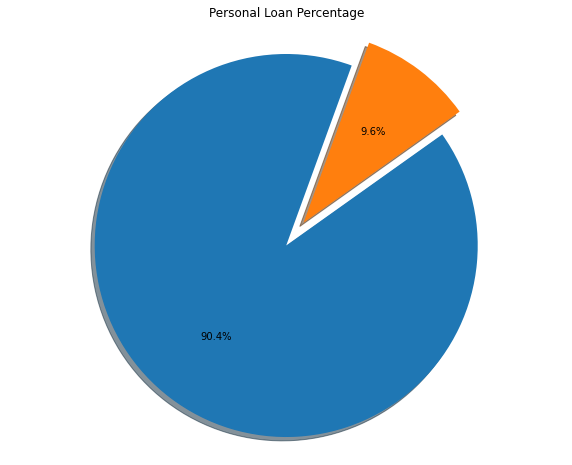

In [272]:
## Univariate Analysis
## 9.6 % all the applicats get approved for personal loan
tempDF =pd.DataFrame(dataset["Personal Loan"].value_counts()).reset_index()
tempDF.column = ["Lables","Personal Loan"]
figl, axl = plt.subplots(figsize=(10,8))
explode = (0, 0.15)
axl.pie(tempDF["Personal Loan"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=70)
axl.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

0    4520
1     480
Name: Personal Loan, dtype: int64


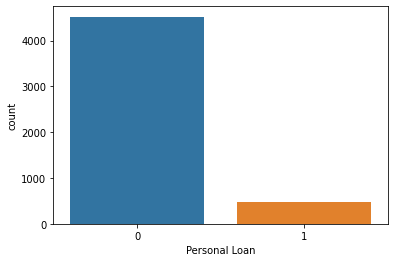

In [273]:
# Plotting the target variable, Personal Loan.
print(dataset['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=dataset)

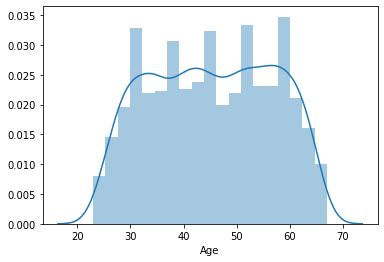

In [274]:
# Age seems to have symmetric distribution
sns.distplot(dataset.Age);

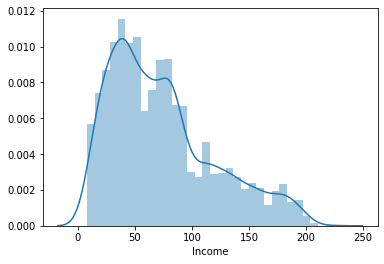

In [275]:
# Income is right skewed distribution , it means richer people take less personal loans.
sns.distplot(dataset.Income);

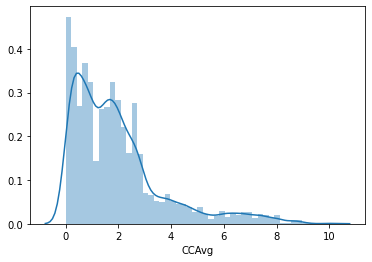

In [276]:
# Credit Card Average is right skewed distribution
sns.distplot(dataset.CCAvg);

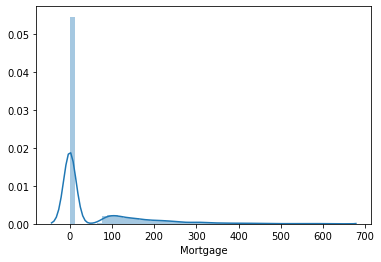

In [277]:
# Mortgage column seems highly skewed
sns.distplot(dataset.Mortgage);

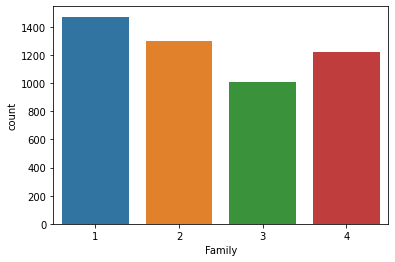

In [278]:
# Plotting Family feature variable
sns.countplot(dataset.Family);

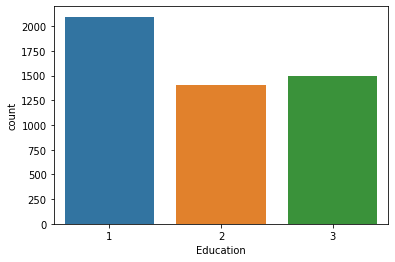

In [279]:
# Plotting Education feature variable
# People taking the personal loan increases with increase in the education level
sns.countplot(dataset.Education)

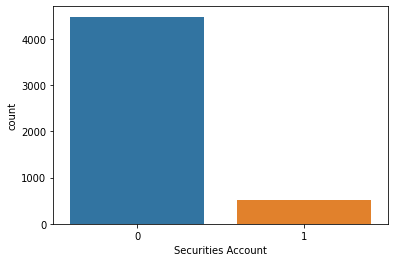

In [280]:
# Plotting Securities Account feature variable
sns.countplot(dataset['Securities Account'])

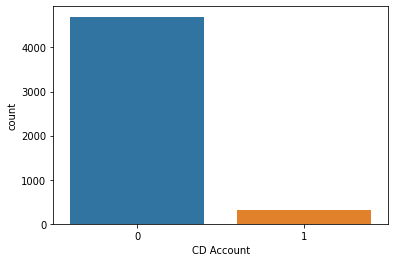

In [281]:
# Plotting CD Account feature variable
sns.countplot(dataset['CD Account'])

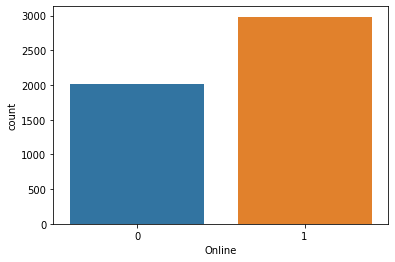

In [282]:
# Plotting Online feature variable
sns.countplot(dataset['Online'])

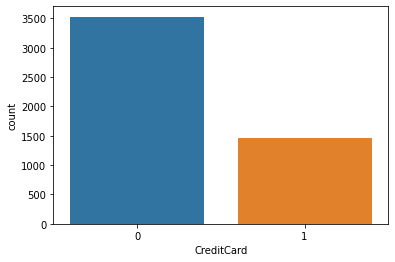

In [283]:
# Plotting CreditCard feature variable
sns.countplot(dataset['CreditCard'])

**Bivariate Analysis**

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


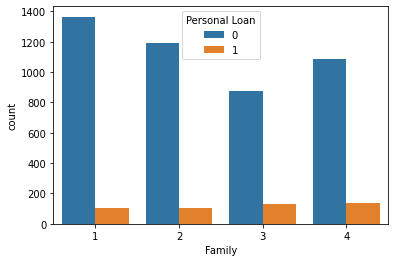

In [284]:
# Family
# No of people taking loan increases slightly with increase in family size.
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=dataset,hue='Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


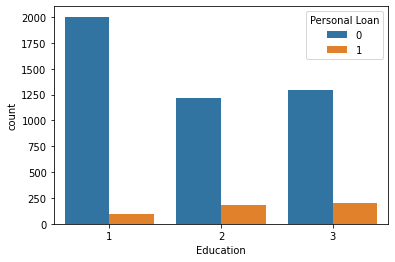

In [285]:
# Education
# No of people taking personal loan increases with increase in education level. 
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=dataset,hue='Personal Loan')

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


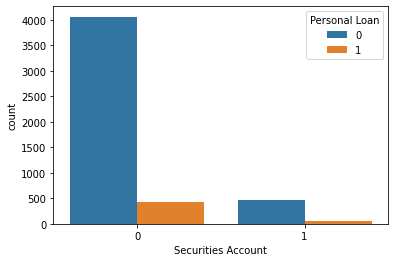

In [286]:
# Securities Account
# Majority of people having securities Account have not accepted the personal loan offered in the last campaign
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=dataset,hue='Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


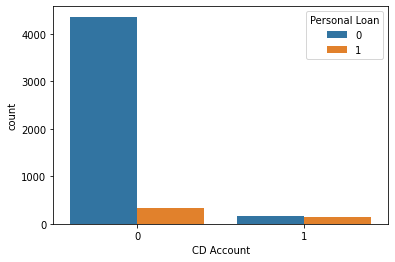

In [287]:
# CD Account
# Almost all the people having a CD Account take the personal loan.
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=dataset,hue='Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


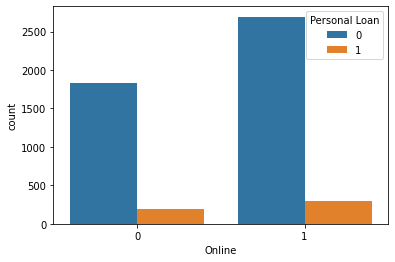

In [288]:
# Online
# No of people using the internet banking facility have taken more personal loan.
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=dataset,hue='Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


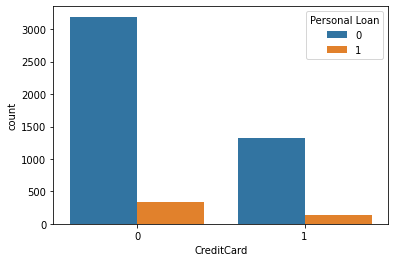

In [289]:
# CreditCard
# No of people taking the personal loan was greater for people not the using credit card
print(pd.pivot_table(data=dataset,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=dataset,hue='Personal Loan')

**Multivariate Analysis**

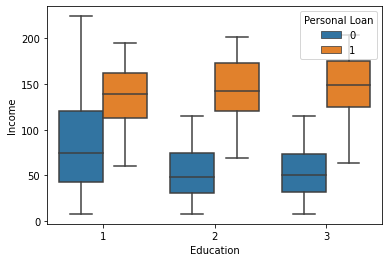

In [290]:
## It seems that customers who have more income is granted loan across each education level.
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = dataset);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


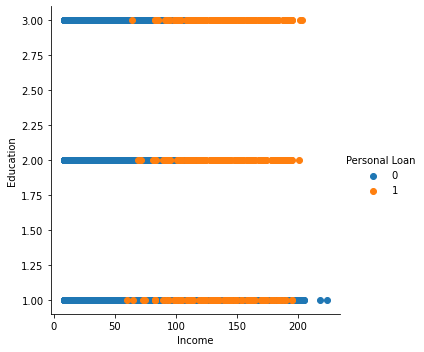

In [291]:
sns.FacetGrid(dataset,hue="Personal Loan",size=5).map(plt.scatter,"Income","Education").add_legend()
plt.show()

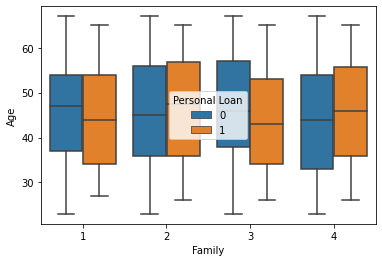

In [292]:
# People of age group 35-55 are more likely to take the personal loan 
sns.boxplot(x='Family',y='Age',data=dataset,hue='Personal Loan')

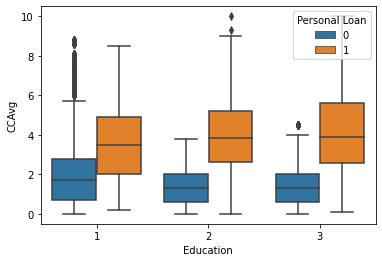

In [293]:
# People taking personal loan have higher Avg. spending on credit cards per month($000) in range of 1.5 to 5 across all education levels
# Here some outliers also exist in this plot.
sns.boxplot(x='Education', y='CCAvg', hue='Personal Loan', data = dataset);

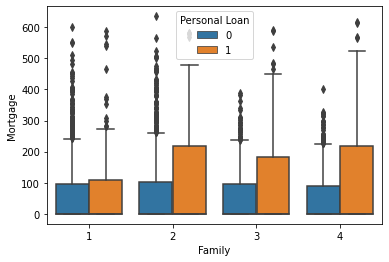

In [294]:
# People take personal loan who are having value of house mortgage if any($000).
# Many outliers exists in this plot. 
sns.boxplot(x='Family', y='Mortgage', hue='Personal Loan', data = dataset);

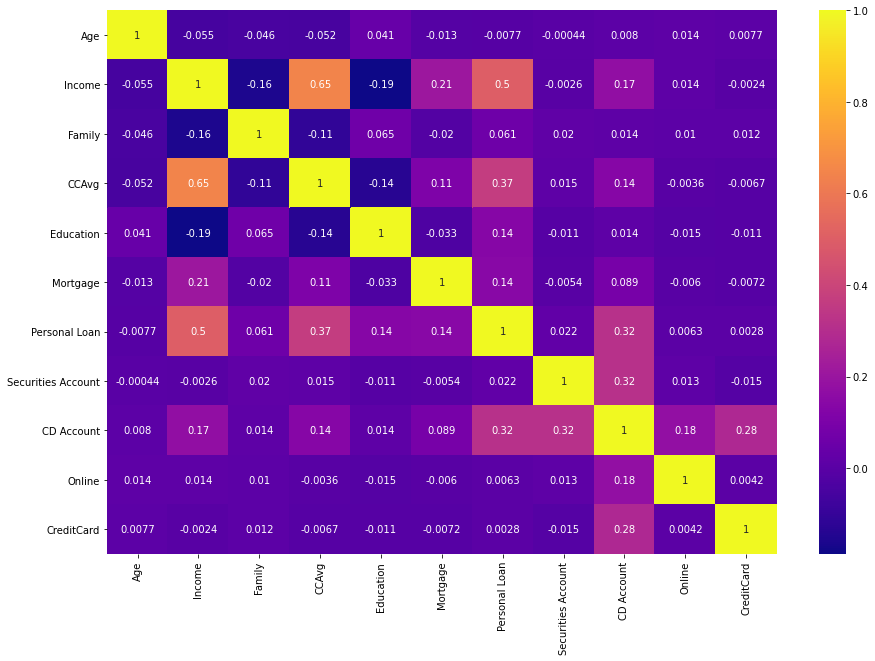

In [295]:
# Variables other than categorical in nature doesn't seem to have significant correlation b/w other variables except CCAvg and income which have a correlation of 0.65
fix,ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True); 

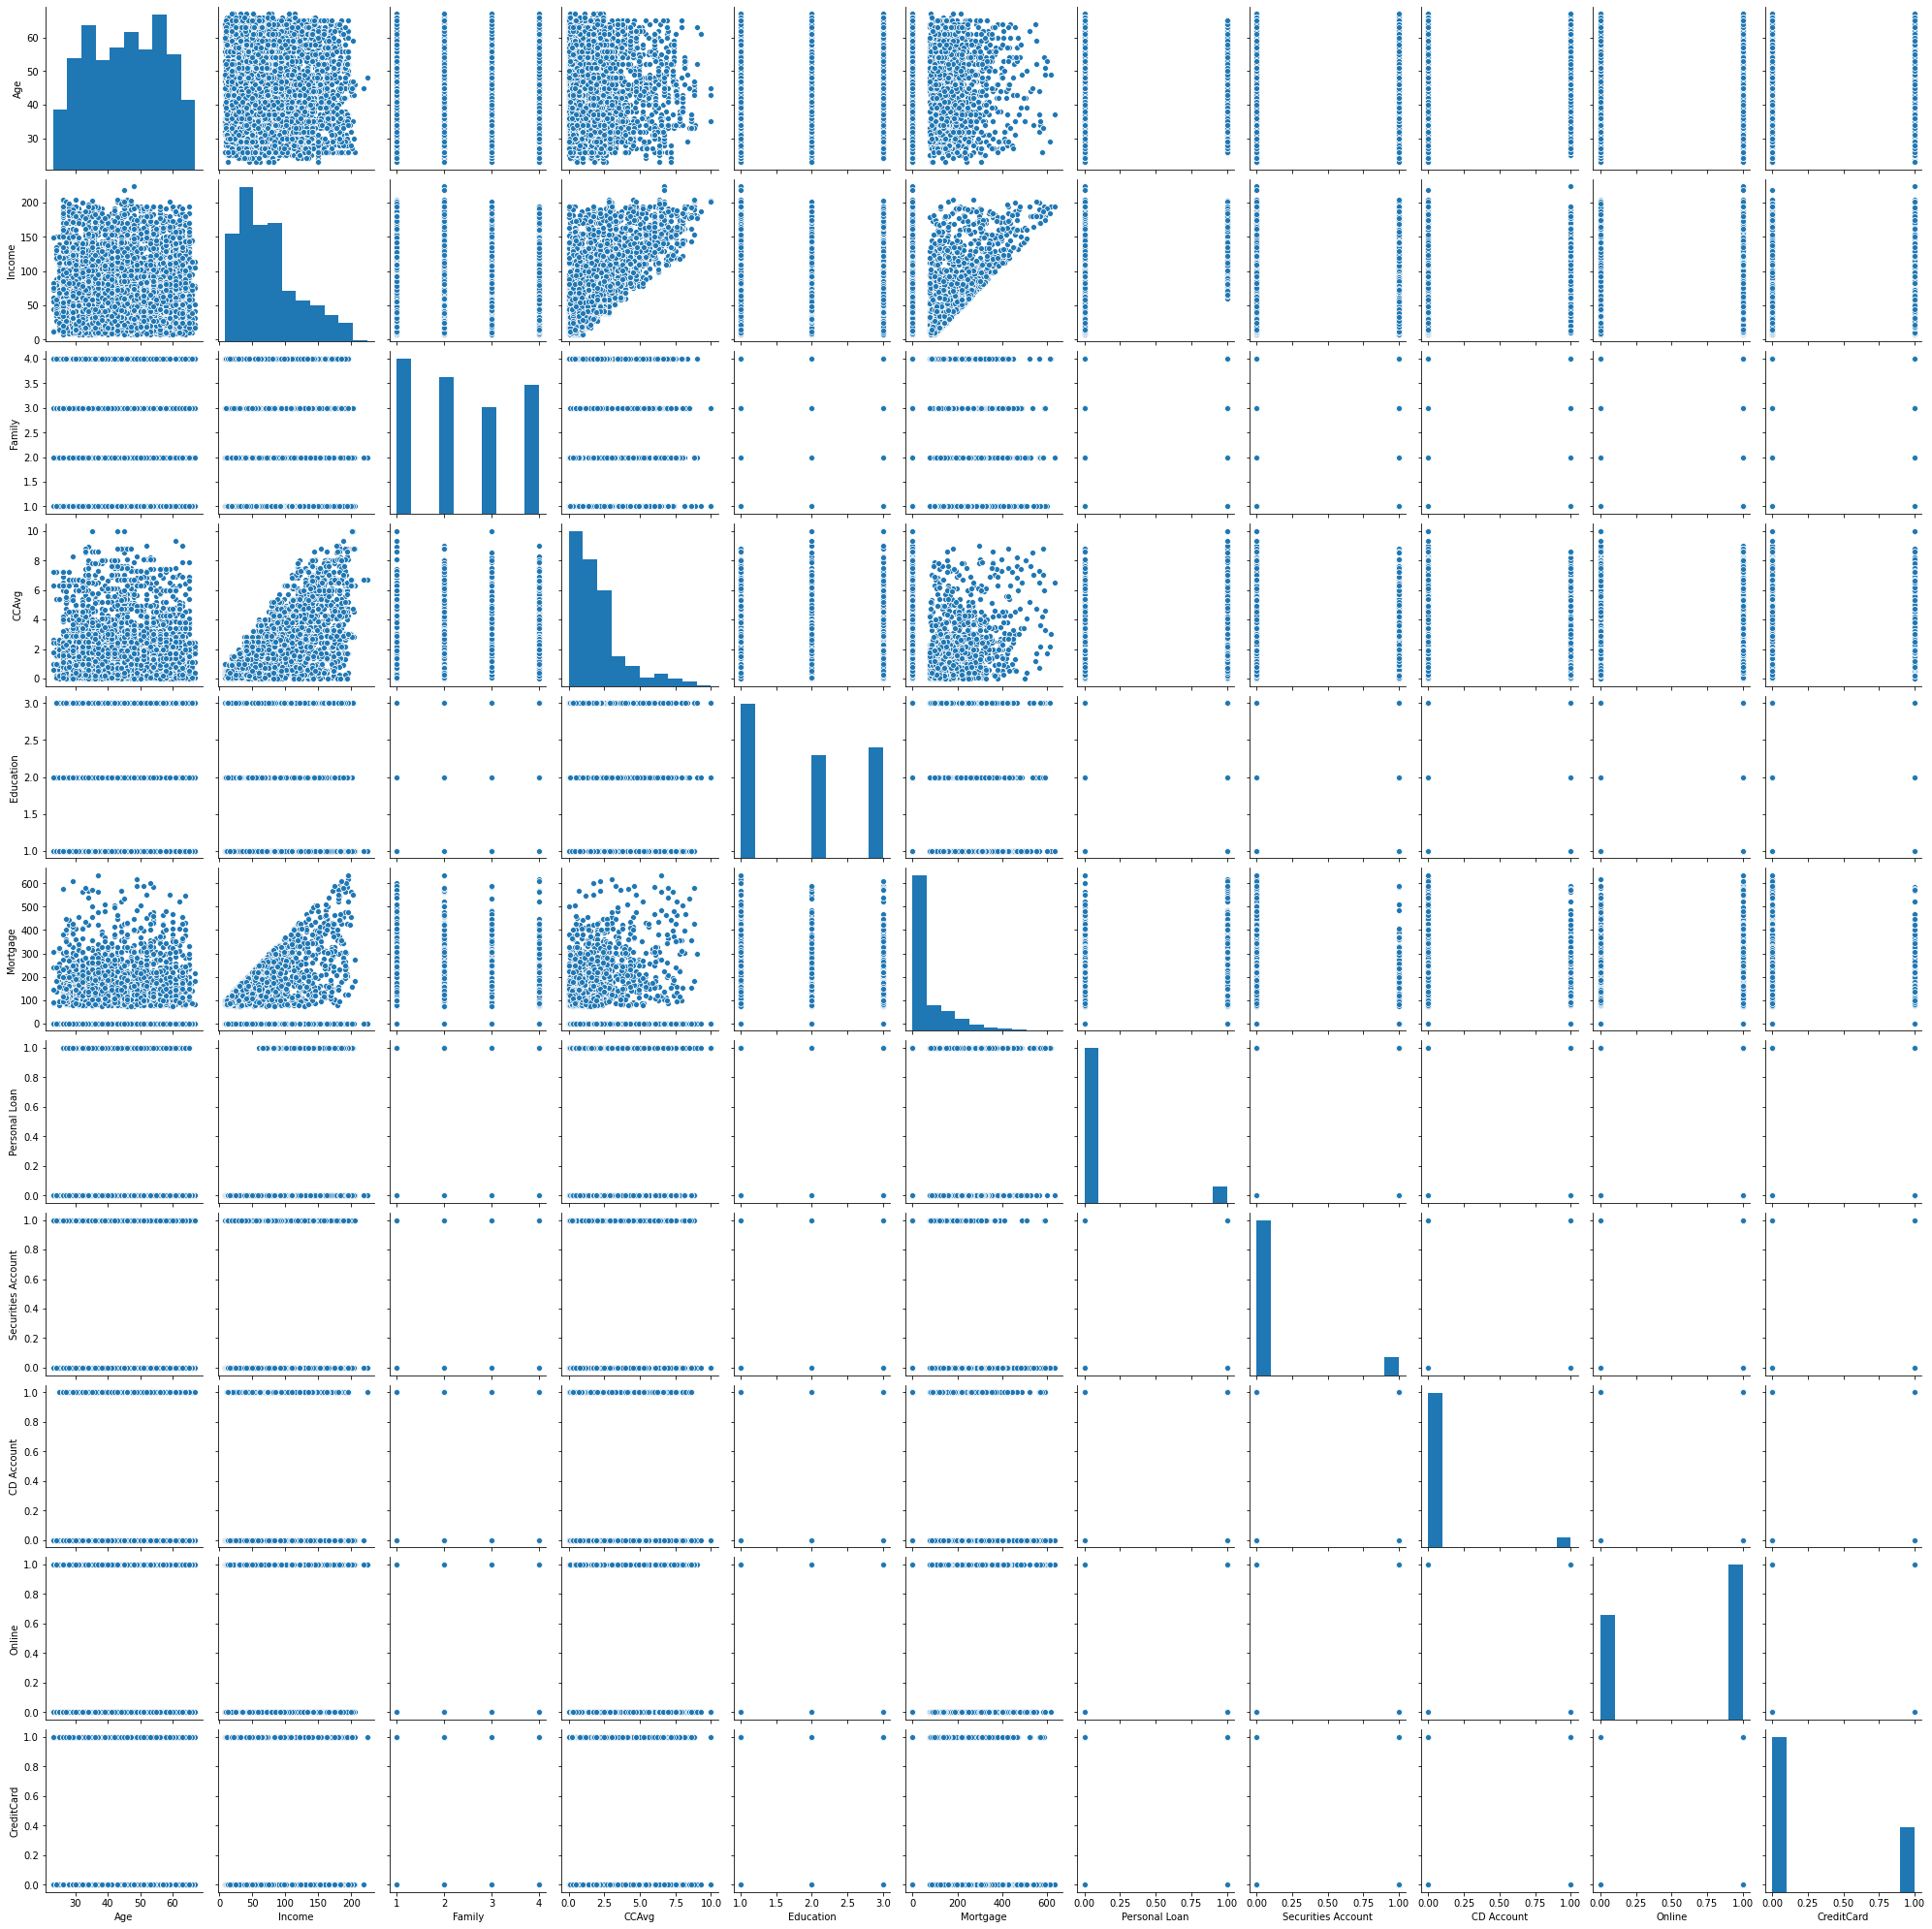

In [296]:
# Tt will plot every variable with every other variable
sns.pairplot(dataset)

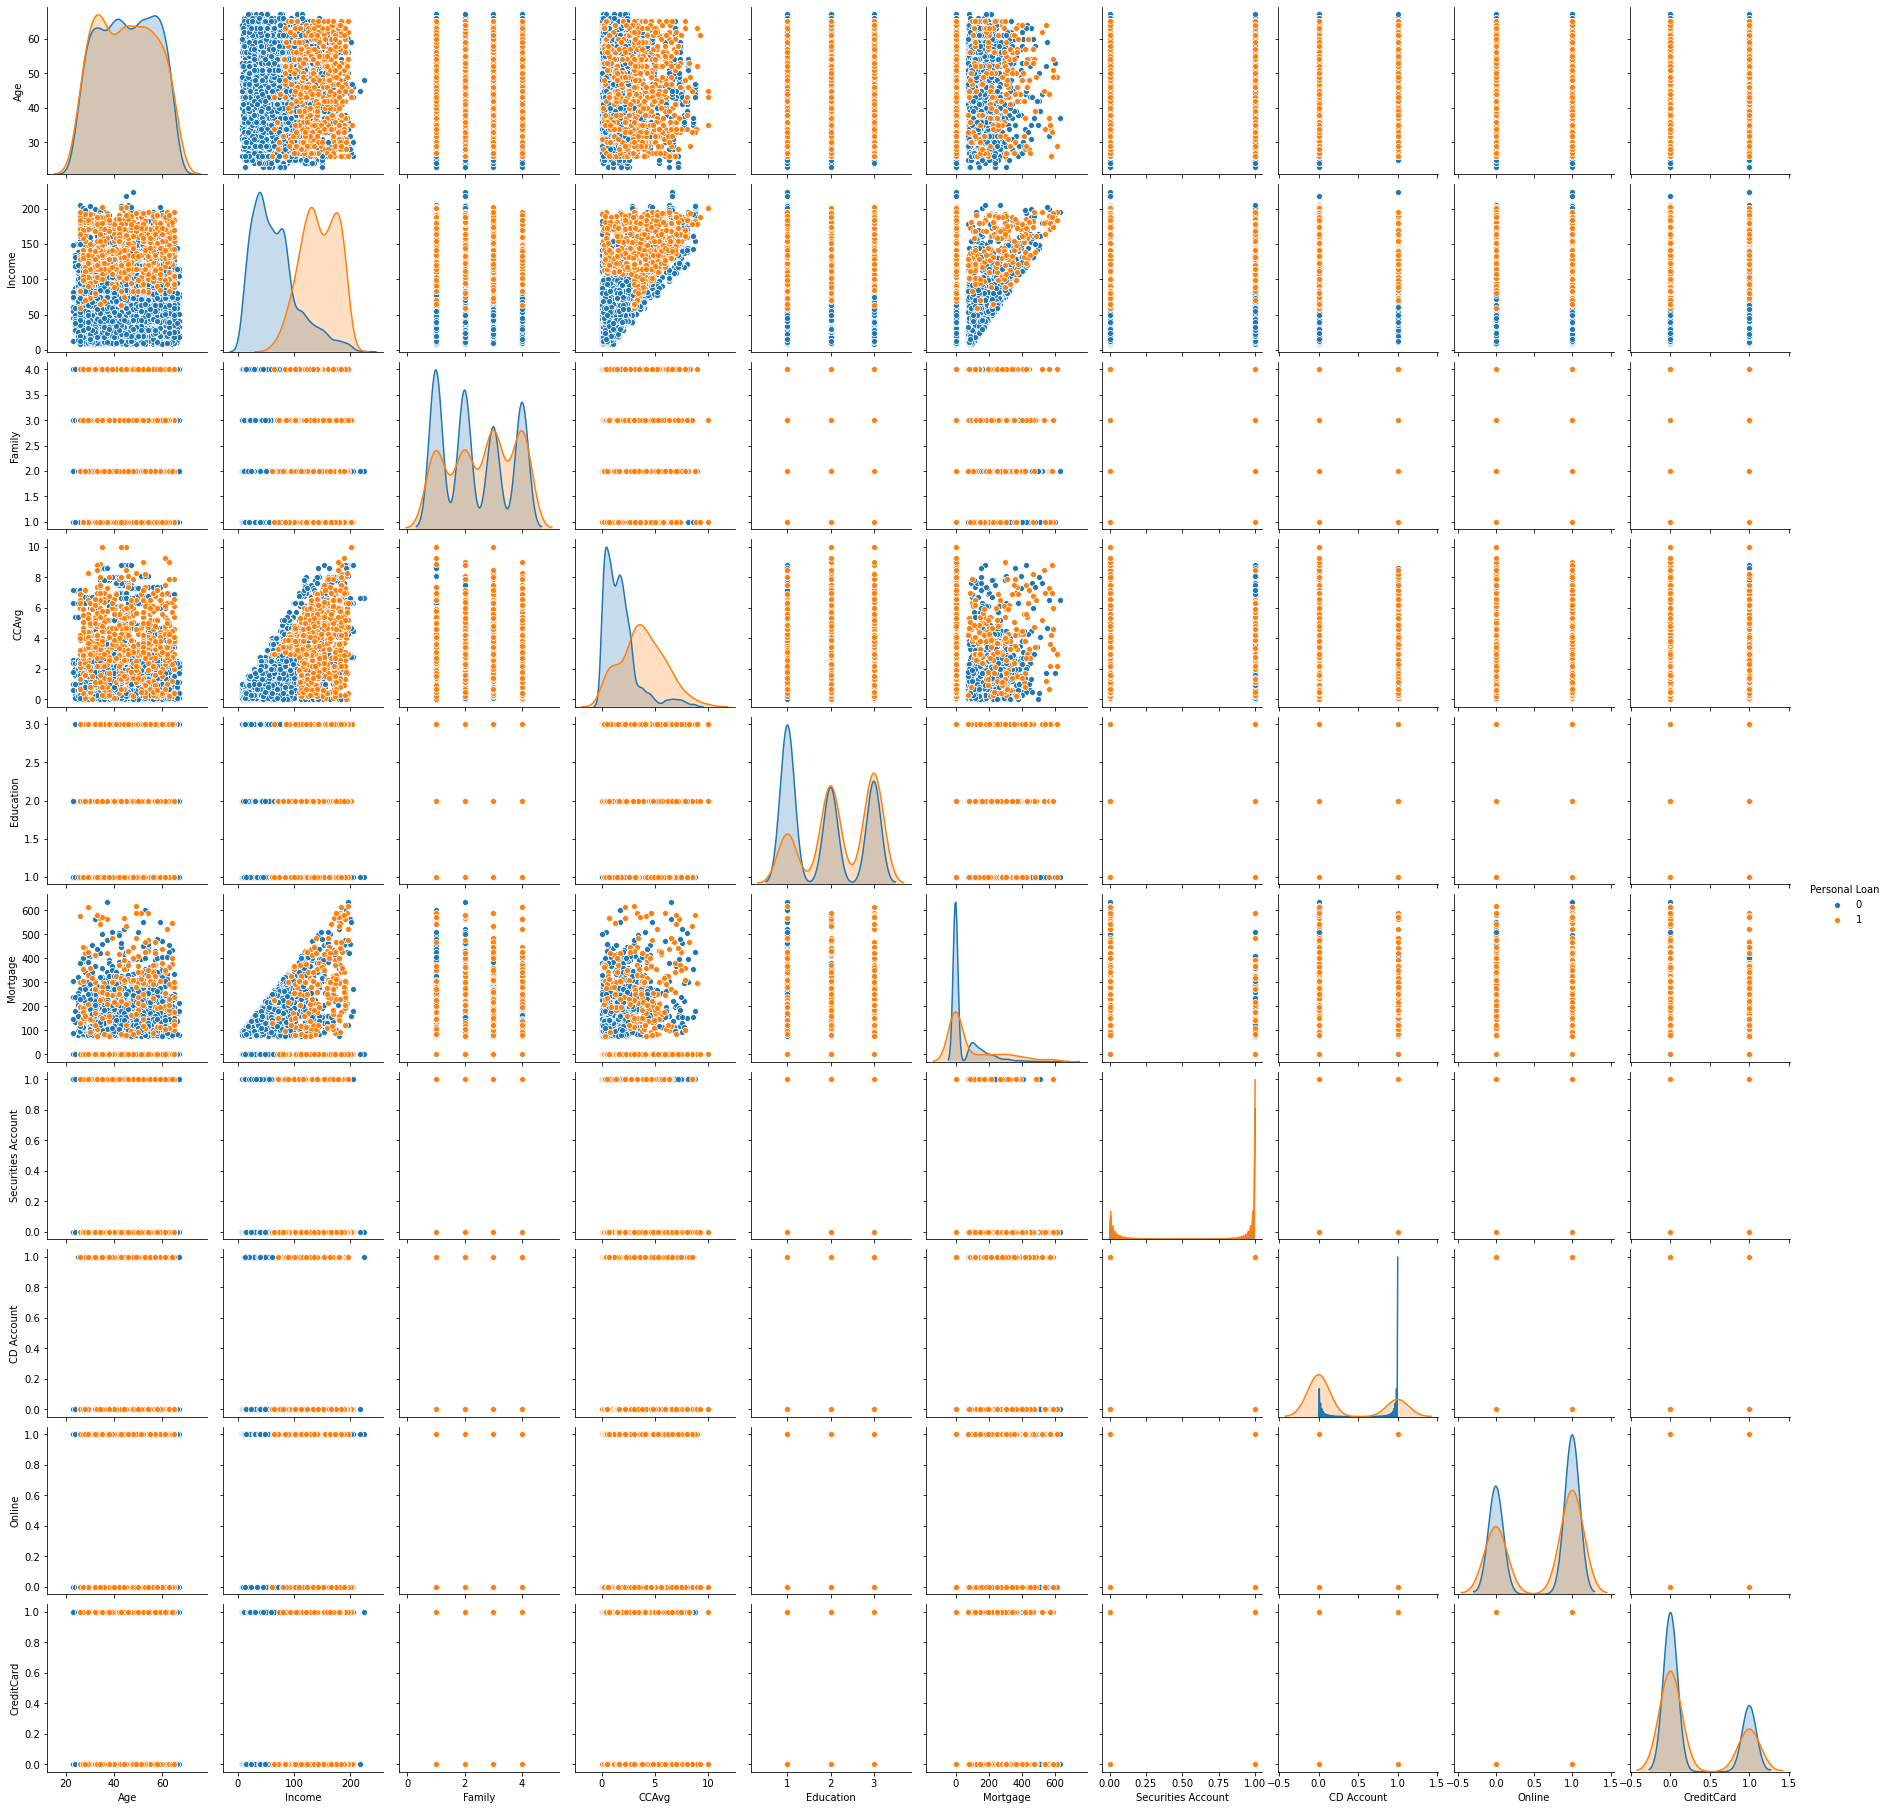

In [297]:
# It will plot every feature variable with the target variable i.e. personal loan.
sns.pairplot(dataset, hue='Personal Loan')

In [298]:
dataset.groupby(['Personal Loan']).agg(['mean','median'])

Age             Income  ... Online CreditCard       
                    mean median        mean  ... median       mean median
Personal Loan                                ...                         
0              45.367257     45   66.237389  ...      1   0.293584      0
1              45.066667     45  144.745833  ...      1   0.297917      0

[2 rows x 20 columns]

In [299]:
dataset.groupby(['Personal Loan']).agg(['min','max'])

Age     Income      Family  ... CD Account Online     CreditCard    
              min max    min  max    min  ...        max    min max        min max
Personal Loan                             ...                                     
0              23  67      8  224      1  ...          1      0   1          0   1
1              26  65     60  203      1  ...          1      0   1          0   1

[2 rows x 20 columns]

**Step 4:** 
Apply necessary transformations for the feature variables

In [300]:
#changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
dataset[var]=dataset[var].astype('category')
dataset.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [301]:
# Defining the features variables and the target or output variable
data_X = dataset.loc[:, dataset.columns != 'Personal Loan']
data_Y = dataset[["Personal Loan"]]

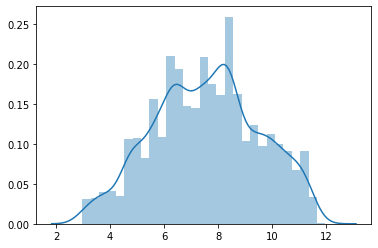

In [302]:
# Applying necessary transformations for the feature variables
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp = pt.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(temp);

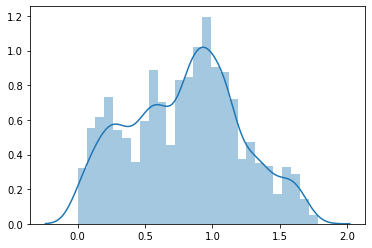

In [303]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(temp);

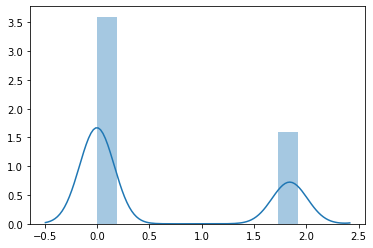

In [304]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['Mortgage'].values.reshape(-1,1))
temp = pt.transform(data_X['Mortgage'].values.reshape(-1,1))
sns.distplot(temp);

In [305]:
#Transforming Mortgage through Label encoding to avoid the case
data_X['Mortgage_Int'] = pd.cut(data_X['Mortgage'],
bins=[0, 100, 200, 300, 400, 500, 600, 700],
labels = [0,1,2,3,4,5,6],
include_lowest = True)
data_X.drop("Mortgage", axis=1, inplace=True)


In [306]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


**Step 5:**
Normalise your data and split the data into training and testing set in
respectively

Splitting the data using stratified sampling

In [307]:
# Test Train Split
# Splitting the dataset into training and testing data with a ratio of 8:2 using stratified sampling(since we need to maintain the right proportion in every sample)
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.25 , stratify = data_Y, random_state=0)

In [308]:
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [309]:
train_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,52,55,1,1.6,2,0,0,0,0,2
1,38,54,2,0.6,3,0,0,0,0,2
2,35,21,3,1.3,1,0,0,0,0,1
3,61,60,1,2.8,2,0,0,1,1,0
4,59,10,4,0.7,3,0,0,1,0,0


Scaling the data

In [310]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X[['Age','Income','CCAvg']] = scaler.fit_transform(train_X[['Age','Income','CCAvg']])
test_X[['Age','Income','CCAvg']] = scaler.transform(test_X[['Age','Income','CCAvg']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [312]:
# Feature Scaling library
# Standardising the data
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(train_X.columns):
  scaler = StandardScaler()

# fit to train data
scaler.fit(train_X[[column]])

# transforming the training data
np_array = scaler.transform(train_X[[column]])
train_X.loc[:, column] = pd.Series(np_array.flatten())

# transforming the testing data
np_array = scaler.transform(test_X[[column]])
test_X.loc[:, column] = pd.Series(np_array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [314]:
# Considering the 3 models Logistic Regression, Decision Tree and Random Forest 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Converting the dataframe to numpy arrays
np_train_X = train_X.values
np_train_Y = train_Y.values
np_test_X = test_X.values
np_test_Y = test_Y.values

**Step 6:**
Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

**Logistic Regression Model Implementation**

In [315]:
lr = LogisticRegression(random_state=0)
# fitting the Logistic Regression model on train_X and predict on test_X
lr.fit(np_train_X, np_train_Y.ravel())
predict_lr_test_X = lr.predict(np_test_X)
predict_lr_train_X = lr.predict(np_train_X)
accuracy_lr_train_X = accuracy_score(np_train_Y, predict_lr_train_X)
accuracy_lr_test_X = accuracy_score(np_test_Y, predict_lr_test_X)
print("Logistic Regression accuracy on np_train_X: {:.4f}".format(accuracy_lr_train_X))
print("Logistic Regression accuracy on np_test_X: {:.4f}".format(accuracy_lr_test_X))

Logistic Regression accuracy on np_train_X: 0.9539
Logistic Regression accuracy on np_test_X: 0.9464


**Step 8:**
Build various other classification algorithms and compare their performance

**Decision Tree**

In [316]:
# Avoiding overfitting in Decision Tree by assigning max_depth to 8, other wise we may get 100% accuracy
dt = DecisionTreeClassifier(random_state=0, max_depth=7)

# fitting the Decision Tree model on train_X and predict on test_X
dt.fit(np_train_X, np_train_Y.ravel())
predict_dt_test_X = dt.predict(np_test_X)
predict_dt_train_X = dt.predict(np_train_X)
accuracy_dt_train_X = accuracy_score(np_train_Y, predict_dt_train_X)
accuracy_dt_test_X = accuracy_score(np_test_Y, predict_dt_test_X)
print("Decision Tree accuracy on np_train_X: {:.4f}".format(accuracy_dt_train_X))
print("Decision Tree accuracy on np_test_X: {:.4f}".format(accuracy_dt_test_X))



Decision Tree accuracy on np_train_X: 0.9939
Decision Tree accuracy on np_test_X: 0.9816


**Random Forest**

In [330]:
# Avoiding overfitting in Random Forest by increasing the no. of estimators to 500 from a default value of 100 and assigning max_depth to 8
rf = RandomForestClassifier(random_state=0, n_estimators=1000, max_depth=7)

# fit the model Random Forest on train_X and predict on test_X
rf.fit(np_train_X, np_train_Y.ravel())
predict_rf_test_X = rf.predict(np_test_X)
predict_rf_train_X = rf.predict(np_train_X)
accuracy_rf_train_X = accuracy_score(np_train_Y, predict_rf_train_X)
accuracy_rf_test_X = accuracy_score(np_test_Y, predict_rf_test_X)
print("Random Forest accuracy on np_train_X: {:.4f}".format(accuracy_rf_train_X))
print("Random Forest accuracy on np_test_X: {:.4f}".format(accuracy_rf_test_X))

Random Forest accuracy on np_train_X: 0.9939
Random Forest accuracy on np_test_X: 0.9864


**Step 7:**
Print all the metrics related for evaluating the model performance

**Confusion Matrix**

In [318]:
# confusion matrix
def draw_cm(actual,predicted):
  cm = confusion_matrix(actual,predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels =[0,1] , yticklabels = [0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

In [319]:
np_test_Y.shape

(1250, 1)

# Model Comaparison

Logistic Regression

Confusion Matrix


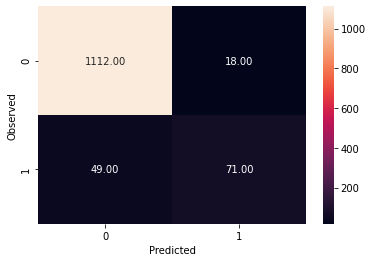

None


In [320]:
# Confusion Matrix for model1 - Logistic Regression
print('Confusion Matrix')
print(draw_cm(np_test_Y,predict_lr_test_X.reshape(-1,1)))

In [322]:
# metrics for model1 - Logistic Regression
print('Logistic Regression Metrics')
print()
print("Recall:",recall_score(np_test_Y,predict_lr_test_X))
print("Precision:",precision_score(np_test_Y,predict_lr_test_X))
print("F1 Score:",f1_score(np_test_Y,predict_lr_test_X))
print("Roc auc score:",roc_auc_score(np_test_Y,predict_lr_test_X))


Logistic Regression Metrics

Recall: 0.5916666666666667
Precision: 0.797752808988764
F1 Score: 0.6794258373205742
Roc auc score: 0.787868731563422


In [323]:
# Details of the metrics
# classification Report of Logistic Regression
print(classification_report(np_test_Y,predict_lr_test_X))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.80      0.59      0.68       120

    accuracy                           0.95      1250
   macro avg       0.88      0.79      0.83      1250
weighted avg       0.94      0.95      0.94      1250



Decision Tree Classifier

Confusion Matrix


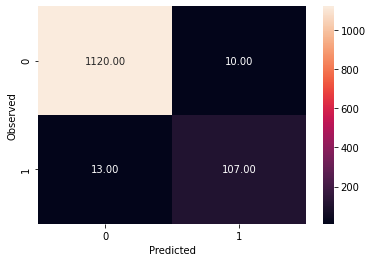

None


In [331]:
# Confusion Matrix for model2 - Decision Tree Classifier
print('Confusion Matrix')
print(draw_cm(np_test_Y,predict_dt_test_X.reshape(-1,1)))

In [325]:
# metrics for model2 - Decision Tree Classifier
print('Decision Tree Metrics')
print()
print("Recall:",recall_score(np_test_Y,predict_dt_test_X))
print("Precision:",precision_score(np_test_Y,predict_dt_test_X))
print("F1 Score:",f1_score(np_test_Y,predict_dt_test_X))
print("Roc auc score:",roc_auc_score(np_test_Y,predict_dt_test_X))

Decision Tree Metrics

Recall: 0.8916666666666667
Precision: 0.9145299145299145
F1 Score: 0.9029535864978904
Roc auc score: 0.9414085545722713


In [332]:
# Details of the metrics
# classification Report of Decision Tree
print(classification_report(np_test_Y,predict_dt_test_X))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.91      0.89      0.90       120

    accuracy                           0.98      1250
   macro avg       0.95      0.94      0.95      1250
weighted avg       0.98      0.98      0.98      1250



Random Forest Classifier

Confusion Matrix


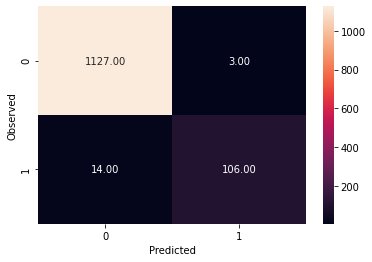

None


In [327]:
# Confusion Matrix for model3 - Random Forest Classifier
print('Confusion Matrix')
print(draw_cm(np_test_Y,predict_rf_test_X.reshape(-1,1)))

In [328]:
# metrics for model3 - Random Forest Classifier
print('Random Forest Metrics')
print()
print("Recall:",recall_score(np_test_Y,predict_rf_test_X))
print("Precision:",precision_score(np_test_Y,predict_rf_test_X))
print("F1 Score:",f1_score(np_test_Y,predict_rf_test_X))
print("Roc auc score:",roc_auc_score(np_test_Y,predict_rf_test_X))

Random Forest Metrics

Recall: 0.8833333333333333
Precision: 0.9724770642201835
F1 Score: 0.925764192139738
Roc auc score: 0.940339233038348


In [333]:
# Details of the metrics
# classification Report of Random Forest
print(classification_report(np_test_Y,predict_rf_test_X))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.97      0.88      0.93       120

    accuracy                           0.99      1250
   macro avg       0.98      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



**Step 9:**
Give a business understanding of your model

# BUSINESS UNDERSTANDING
As only 9.6% of all the applicants get approval for a personal loan, we needed a model to optimize this problem to save time and money.
As earlier without applying the ML model approximately only 9% of the people accepted the loans offered to them and the rest 91% were not approved. Hence after applying our ML model, it should provide us with an accuracy greater than 91%. In this way, the model will be beneficial for the banks using it.

The dataset contained no missing values(i.e. no null values NaN) but there were several outliers which affected the mean and the data distribution. The outliers were detected and handled accordingly.
The dataset contained datatype of int64 and float64 type out of which some were later converted into categorical. The dataset also contained feature variable having a skewed distribution and these were later normalized and transformations were applied on them. Experience column contained faulty/error (having negative values) data, 52 records had Experience less than zero, this was an error.

'Age' and 'Experience' had a very high correlation, hence Experience column was unnecessary and thus removed. Also feature variables like 'ID' and 'ZIP CODE' had no impact in predicting the output/target variable and these were acting as noise to the signal, hence they were also removed from the dataset. 

Variables other than categorical in nature doesn't seem to have significant correlation b/w other variables except for CCAvg and income which have a correlation of 0.65.

Income, CCAvg and CD Account have the highest correlation with Personal Loan with 0.5,0.37,0.32 respectively.
Thus these could be considered as the most important feature variables in determining the target variable - Personal Loan.

ZIP Code, Experience, CreditCard and Online have the least correlation with Personal Loan with 0.00011,0.0074,00.28,0.0063 respectively.
These variable were not very important in predicting the outcome variable - Personal Loan.

# Other Insights from the steps and graphs plotted

Age is having symmetric distribution.

Income has a right-skewed distribution, meaning richer people take less personal loans.

Credit Card Average is a right-skewed distribution.

Mortgage column seems highly skewed.

No of people taking loan increases slightly with an increase in family size.

No of people taking personal loan increases with increase in education level.

Majority of people having securities Account have not accepted the personal loan offered in the last campaign.

Almost all the people having a CD Account take the personal loan.

No of people using the internet banking facility has taken more personal loan.

No of people taking the personal loan was greater for people, not the using credit card.

It seems that customers who have more income are granted loan across each education level.

People of age group 35-55 are more likely to take the personal loan.

People taking personal loan have higher Avg. spending on credit cards per month($000) in a range of 1.5 to 5 across all education levels.

 # Comparision of Different Models and Metrics
Random Forest model is predicting better results with more accuracy and also higher performance for the metrics like Recall, F1 Score and Precision. Also, Random Forest has got the lowest False Negative(FN) values, we cannot miss out on them as these are the people who actually are more likely to accept the personal loan, but the ML model is predicting them that they would not accept the loan. So the lesser the value of False Negatives(FN) [in the left bottom of the confusion matrix], the better the model becomes. Hence this metric is very crucial in determining the performance of the model, even more than the accuracy of the model since accuracy can be achieved by increasing the value of FN but our model would not be good. 

And on the other hand, False Positives(FP)[on the top right of confusion matrix] are the values which indicate that these are the people who even if would not accept the personal loan, the model will predict them as people likely to accept the loans and thus we will not miss out the potential customers in this case. Therefore this parameter is not very important for us.

Hence minimising the False Negative(FN) values is important even though we may have high values of False Positives(FP).
Catching all the True Positives(i.e. the people who are actually accepting the loan and the those predicted by the model) is better for the model, higher the value, better is the model. Accuracy is not always a good metric and we cannot rely on the accuracy and have to check for least values of False Negatives.

Therefore to conclude we should always go by FN metric since it is very crucial in determining the outcome and we don't want to miss out on the potential customers, hence the lesser it gets, the better the model becomes and we have got it least for Random Forest Classifier model.
Metrics such as recall, f1 score, roc-auc score and precision are higher for Random Forest Model. 

Hence for this problem statement, Random Forest Classifier can be considered as the best model. This model will help the bank identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


